Name: MARIEN BERNARD M

ML QUESTIONS :- SOLUTIONS

1. Create two custom layers in tensorflow that add two inputs and multiply two inputs
respectively [or any other mathematical operations of your choice(linear or nonlinear)]
Add layer names and other things that are present in other common layers in tensorflow.

In [15]:
# Importing tensorflow

import tensorflow as tf

# We are defining two functions for addition and multiplication

def add_layer(inputs):
  return tf.math.add(inputs[0],inputs[1]) # math.add is used for adding
def multiply_layer(inputs):
  return tf.math.multiply(inputs[0],inputs[1]) # math.multiply is used for multiplication

# Creating inputs

input1= tf.keras.layers.Input(shape=(4,),name='input_1') # keras.layers.Input is a predefined function for getting inputs
input2= tf.keras.layers.Input(shape=(4,),name='input_2')

# Creating layers for addition and multiplication

addition_layer=tf.keras.layers.Lambda(add_layer,name="add_layer")([input1, input2]) # here we used lambda function to get n number of arguments to do an expression

multiplication_layer=tf.keras.layers.Lambda(multiply_layer,name="multiply_layer")([input1, input2])

print(addition_layer)
print(multiplication_layer)


KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='add_layer/Add:0', description="created by layer 'add_layer'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='multiply_layer/Mul:0', description="created by layer 'multiply_layer'")


Here we have 4 elements in addition layer and 4 elements in multiplication layer

2. Combine these two layers in a third custom layer. Concatenate them or multiply them
etc. (5pts)

In [19]:
# -Concatenation of these two layers

concatenated_layer=tf.keras.layers.Concatenate(name='concatenated_layer')([addition_layer,multiplication_layer])

print(concatenated_layer)


# we will fit a model

model=tf.keras.Model(inputs=[input1,input2],outputs=concatenated_layer)

KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), name='concatenated_layer/concat:0', description="created by layer 'concatenated_layer'")


Here we can see the shape has 8 elements, 4 from addition layer and 4 from multipliacation layer

3. Create a model using these and observe how batch inference works (10 pts)

In [24]:
# First we will import numpy for generating random data

import numpy as np

input_data=np.random.rand(100,10)
input_data1= input_data[:50, :]
input_data2= input_data[50:, :]


# Running this on a single input
single_output=model.predict([input_data1[0],input_data2[0]])
print("Single Output Shape: ",single_output.shape)

# Running this on batch of inputs
batch_output=model.predict([input_data1,input_data2])
print("batch Output Shape: ",batch_output.shape)


1/1 [==============================] - 0s 34ms/step
Single Output Shape:  (20,)
2/2 [==============================] - 0s 7ms/step
batch Output Shape:  (50, 20)


Here we can see , we generated the random input data and splitted into two batches of size 50.
While running for single input it gave size of (20,) and time is 34ms/step

we passed the first batch of first 50 as input_data1 and second half as input_data_2, this runs the pair simultaneously.

the size is (50,20) and time is 7ms/step

The observation is for lager dataset the batch inference is faster than processing individually.

we can try using different batch sizes, using larger batch size gives faster results since model process more inputs simultaneously, but it requires more memory. using smaller batch size gives results slower but is more memory-efficient.

4. Use a predefined layer in tensorflow to split an input/image into 4x4 = 16 tiles (5pts)

In [33]:
# here we use an image which is present locally in colab

# loading the input image

input_iamge = tf.io.read_file("cat.jpg")
input_image = tf.image.decode_image(input_iamge,channels=3)

# set the patch zize and strides 
# lets set it for 4*4 tiles

patch_size=[1, input_image.shape[0]//4, input_image.shape[1]//4,1]
stride=patch_size

# Extracts patches using extract_patch() function
patches= tf.image.extract_patches(images=tf.expand_dims(input_image,axis=0),
                                  sizes=patch_size,
                                  strides=stride,
                                  rates=[1,1,1,1],
                                  padding='VALID')

# Now lets treshape the patches into 16 tiles

tiles= tf.reshape( patches, [-1, 16, patch_size[1], patch_size[2], 3])

print(tiles)

tf.Tensor(
[[[[[ 24  19  16]
    [ 24  19  16]
    [ 24  19  16]
    ...
    [ 73  56  38]
    [ 70  53  35]
    [ 70  53  35]]

   [[ 24  19  16]
    [ 24  19  16]
    [ 24  19  16]
    ...
    [ 69  52  34]
    [ 66  49  31]
    [ 66  49  31]]

   [[ 24  19  16]
    [ 24  19  16]
    [ 24  19  16]
    ...
    [ 72  55  37]
    [ 69  52  34]
    [ 69  52  34]]

   ...

   [[ 38  33  27]
    [ 39  34  28]
    [ 40  35  29]
    ...
    [ 98  69  53]
    [ 96  69  52]
    [102  75  58]]

   [[ 39  34  28]
    [ 40  35  29]
    [ 41  36  30]
    ...
    [101  72  56]
    [ 95  68  51]
    [ 97  71  54]]

   [[ 33  28  22]
    [ 34  29  23]
    [ 37  32  26]
    ...
    [ 97  70  53]
    [ 95  69  52]
    [ 96  70  53]]]


  [[[ 68  51  33]
    [ 73  56  38]
    [ 74  57  39]
    ...
    [ 77  62  43]
    [ 77  62  43]
    [ 80  65  46]]

   [[ 70  53  35]
    [ 71  54  36]
    [ 69  52  34]
    ...
    [ 67  52  33]
    [ 74  59  40]
    [ 83  68  49]]

   [[ 70  53  35]
    [ 68  51  33]

here we see the shape 16

tf.image.extract_patches(0 is the function which helps in extracting patches from the image. The images takes argument the input image , it is firstly expanded to include a batch dimension tf.expand_dims(). The size arguments takes the patch size given by patch_size and the strides arguments takes the stride given.
Here the rates argument is set to[1,1,1,1] to indicate no dilation is applied. Padding 'VALID' is given so that no padding is done to image

using reshape 16 tiles is acheived.


5. Write a graph data structure in python with random connections between nodes. (5pts)
Refer to the image below:

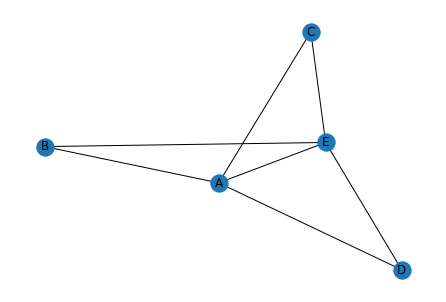

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# defining the graph

graph={'A':{'B','C','D'},
       'B':{'E'},
       'C':{'E'},
       'D':{'E'},
       'E':{'A'}
       }

# creating a Networkx graph object
nx_graph=nx.Graph(graph)

# Visualize the graph using Matplotlib
nx.draw(nx_graph,with_labels=True)
plt.show()


6. Two part question:

You can choose to use the custom model you have created in questions 1 or 2
inside the node. The input can be a random input created using
random.randint(1,100). You can use any error correction techniques we
used before. (5pts)